# Ad Sales Data
# Revenue Regression
Code link: https://www.kaggle.com/code/akshaysunil07/ad-tech-revenue-regression/notebook 

# Installing packages section

In [ ]:
# Installing packages set for without init script
!pip install --upgrade pip
!pip install "snowflake-connector-python[pandas]" "snowflake-snowpark-python[pandas]" snowflake-snowpark-python==1.9.0 fosforio fosforml numpy pandas matplotlib scikit-learn xgboost seaborn python-dateutil tqdm holidays faker
!pip install --upgrade --q snowflake-snowpark-python==1.9.0
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15

In [ ]:
!pip install seaborn

In [ ]:
# pre run in template init script

! pip install "snowflake-connector-python[pandas]"
! sudo pip install snowflake-ml-python==1.0.11 -U
! pip install --upgrade snowflake-snowpark-python==1.9.0
!pip install --q seaborn
!pip install --q plotly 
! pip install --upgrade xgboost==1.7.3
! pip install --upgrade numpy==1.24.3
! pip install --upgrade pandas==1.5.3
! pip install --upgrade anyio==3.5.0
! pip install --upgrade packaging==23.1
! pip install --upgrade scikit-learn==1.3.0
! pip install --upgrade typing-extensions==4.7.1
! pip install --upgrade cryptography==39.0.0
! pip install --upgrade fsspec==2023.9.2
! pip install statsmodels
! pip install xgboost
! pip install catboost

In [ ]:
#Run from here
! pip install fosforio
! pip install fosforml

In [ ]:
#new set after pre init script

!pip install "snowflake-connector-python[pandas]" "snowflake-snowpark-python[pandas]" snowflake-snowpark-python==1.9.0  matplotlib python-dateutil tqdm faker
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15

# Restart and clear outputs

# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib


Matplotlib created a temporary cache directory at /tmp/matplotlib-dzpy1fa8 because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
from fosforio import snowflake
from fosforml import *
from fosforml.constants import MLModelFlavours
from fosforio import get_dataframe
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import warnings; warnings.simplefilter('ignore')
from joblib import dump, load
import requests
from tqdm import tqdm
import time
import calendar
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from time import sleep
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import configparser
from dateutil.relativedelta import relativedelta
import datetime
from dateutil.easter import easter
from scipy.optimize import minimize_scalar
from scipy.optimize import curve_fit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


In [3]:
#df1 = pd.read_csv('C:/Users/10738686/Downloads/ad_sales_data/ad_sales.csv')
#df = df1.sample(n=50000,random_state=10).reset_index(drop=True)

In [4]:
# Importing data from snowflake

In [5]:
# snowflake.get_connection(connection_name="ME_AD_SALES_CXN")

from fosforio import snowflake
from fosforio import get_dataframe

snowflake.get_connection(connection_name="ME_AD_SALES_CXN")

Connection object created: <snowflake.connector.connection.SnowflakeConnection object at 0x7f43dcf57af0>
Please close the connection after use!


In [6]:
df = get_dataframe("AD_SALES_IMP")
df_all = get_dataframe("AD_TECH_INPUT")


Reading dataframe from snowflake native connector
Reading dataframe from snowflake native connector


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DATE                     567291 non-null  object 
 1   SITE_ID                  567291 non-null  int16  
 2   AD_TYPE_ID               567291 non-null  int8   
 3   GEO_ID                   567291 non-null  int16  
 4   DEVICE_CATEGORY_ID       567291 non-null  int8   
 5   ADVERTISER_ID            567291 non-null  int16  
 6   ORDER_ID                 567291 non-null  int16  
 7   LINE_ITEM_TYPE_ID        567291 non-null  int8   
 8   OS_ID                    567291 non-null  int8   
 9   INTEGRATION_TYPE_ID      567291 non-null  int8   
 10  MONETIZATION_CHANNEL_ID  567291 non-null  int8   
 11  AD_UNIT_ID               567291 non-null  int16  
 12  TOTAL_IMPRESSIONS        567291 non-null  int16  
 13  TOTAL_REVENUE            567291 non-null  float64
 14  VIEW

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AD_DATE                  567291 non-null  object 
 1   SITE_ID                  567291 non-null  int16  
 2   AD_TYPE_ID               567291 non-null  int8   
 3   GEO_ID                   567291 non-null  int16  
 4   DEVICE_CATEGORY_ID       567291 non-null  int8   
 5   ADVERTISER_ID            567291 non-null  int16  
 6   ORDER_ID                 567291 non-null  int16  
 7   LINE_ITEM_TYPE_ID        567291 non-null  int8   
 8   OS_ID                    567291 non-null  int8   
 9   MONETIZATION_CHANNEL_ID  567291 non-null  int8   
 10  AD_UNIT_ID               567291 non-null  int16  
 11  TOTAL_IMPRESSIONS        567291 non-null  int16  
 12  TOTAL_REVENUE            567291 non-null  float64
 13  VIEWABLE_IMPRESSIONS     567291 non-null  int16  
 14  MEAS

In [9]:
df.columns = df.columns.str.lower()
df_all.columns = df_all.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     567291 non-null  object 
 1   site_id                  567291 non-null  int16  
 2   ad_type_id               567291 non-null  int8   
 3   geo_id                   567291 non-null  int16  
 4   device_category_id       567291 non-null  int8   
 5   advertiser_id            567291 non-null  int16  
 6   order_id                 567291 non-null  int16  
 7   line_item_type_id        567291 non-null  int8   
 8   os_id                    567291 non-null  int8   
 9   integration_type_id      567291 non-null  int8   
 10  monetization_channel_id  567291 non-null  int8   
 11  ad_unit_id               567291 non-null  int16  
 12  total_impressions        567291 non-null  int16  
 13  total_revenue            567291 non-null  float64
 14  view

In [10]:
# from fosforio import snowflake

# df1 = snowflake.get_dataframe("ME_AD_SALES_SCHEMA.AD_SALES_IMP")
# df1 = get_dataframe("AD_SALES_IMP")
# df1

# Exploratory data analysis

In [11]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']
scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']
num_col=list(df.select_dtypes(np.number).columns)

In [12]:
import seaborn as sns

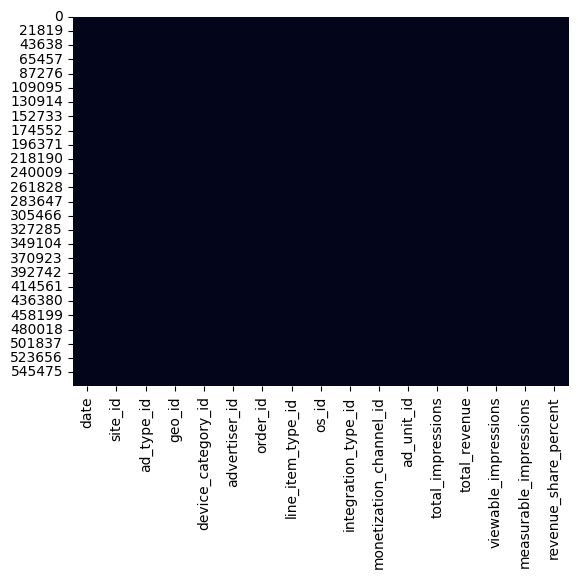

In [13]:
sns.heatmap(df.isnull(),cbar=False,cbar_kws={'color':'r'})
plt.show()

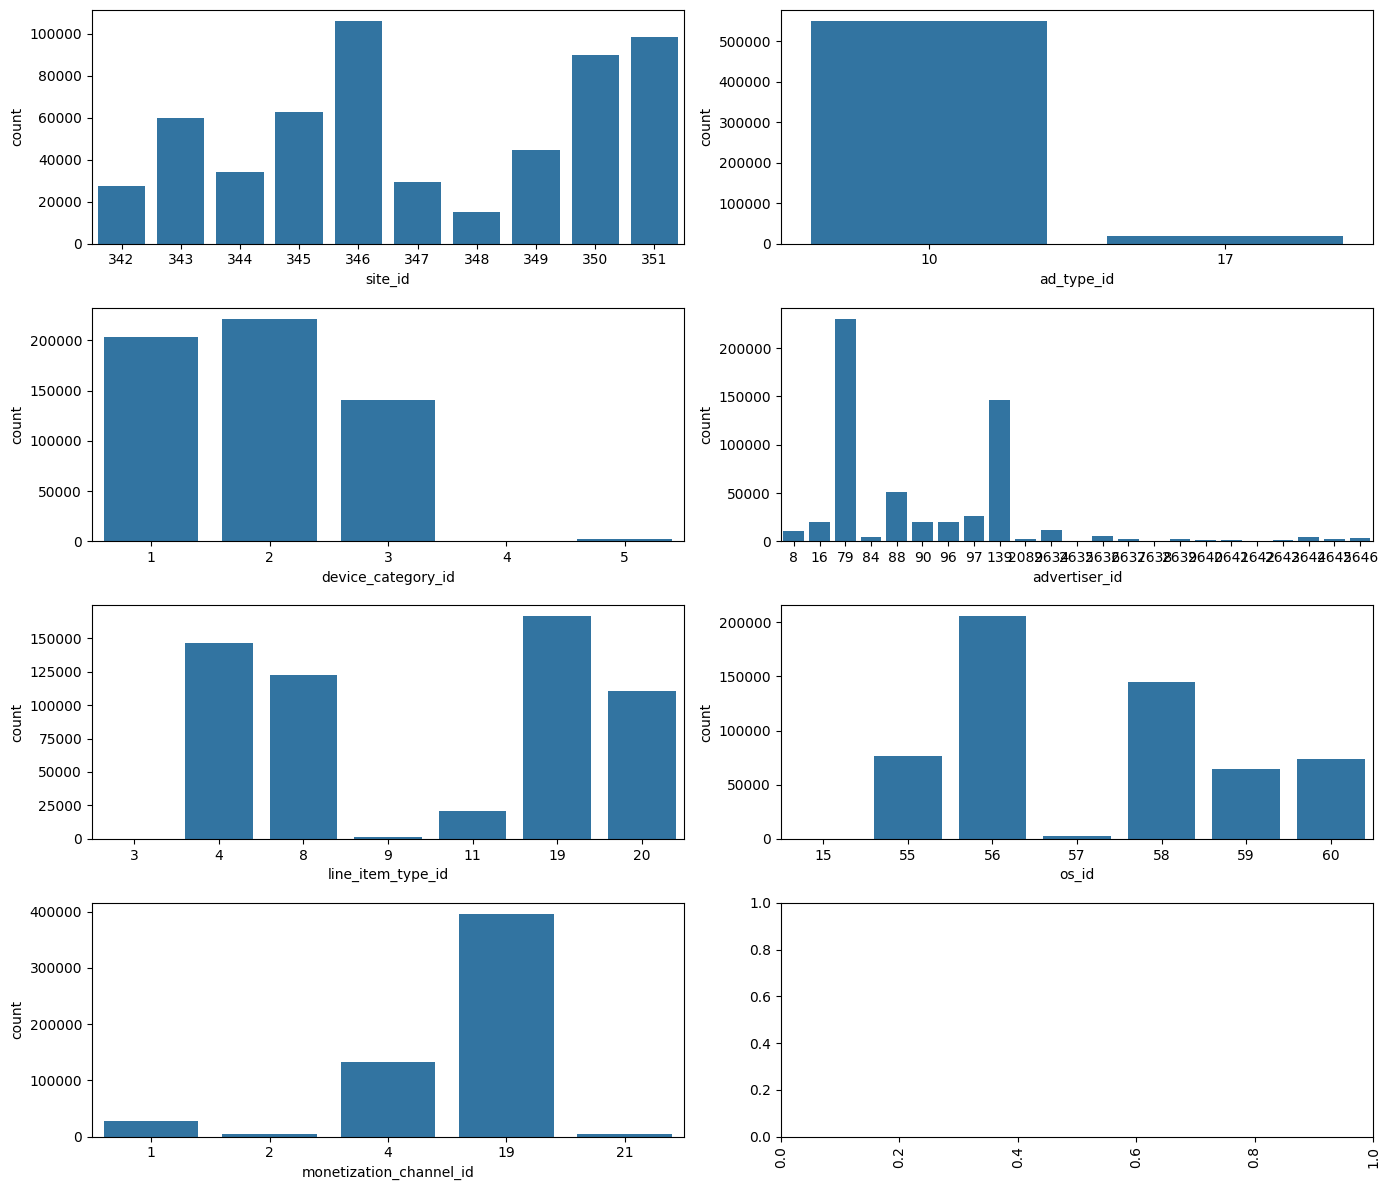

In [14]:
fig, ax = plt.subplots(4,2, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i,col in enumerate(scat_col):
    sns.countplot(data=df,x=col,ax=axes_[i])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.tight_layout()

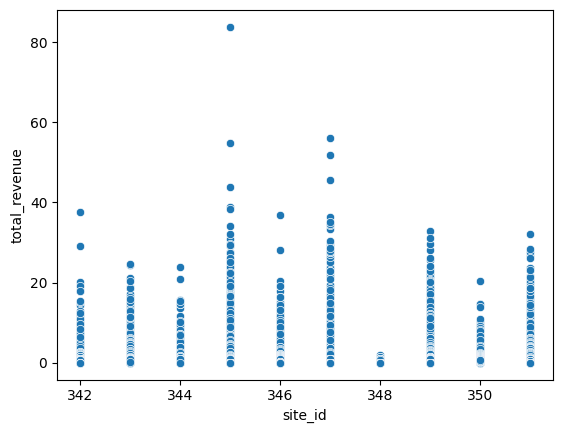

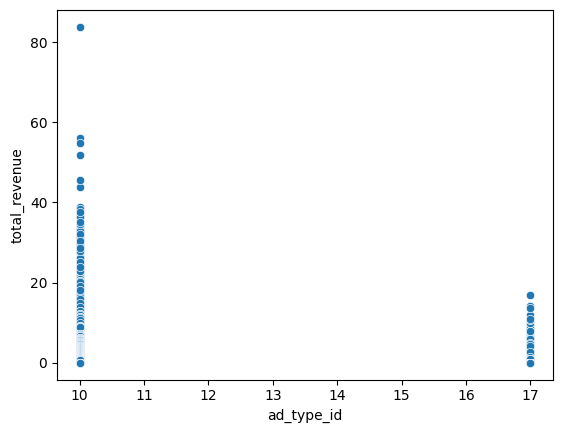

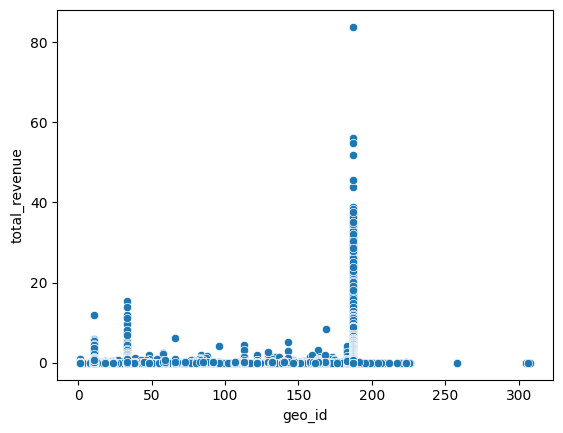

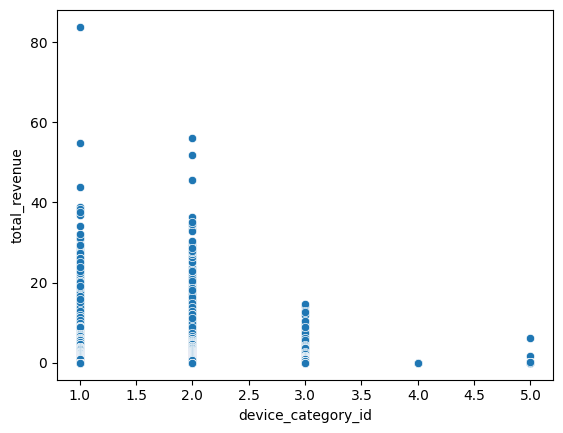

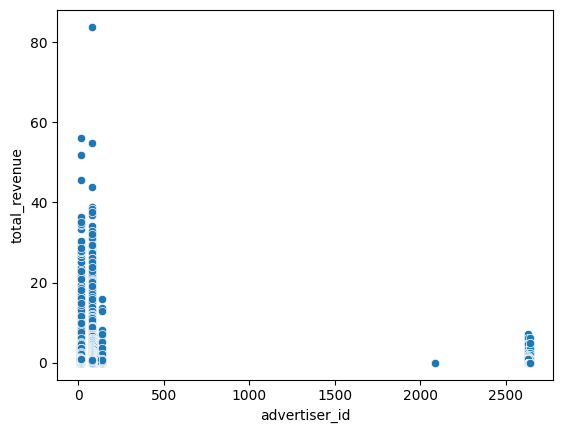

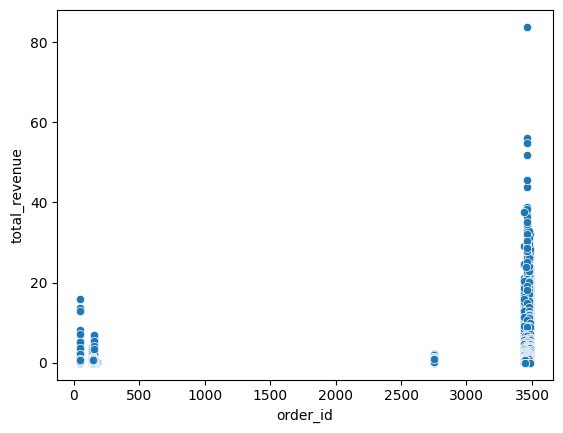

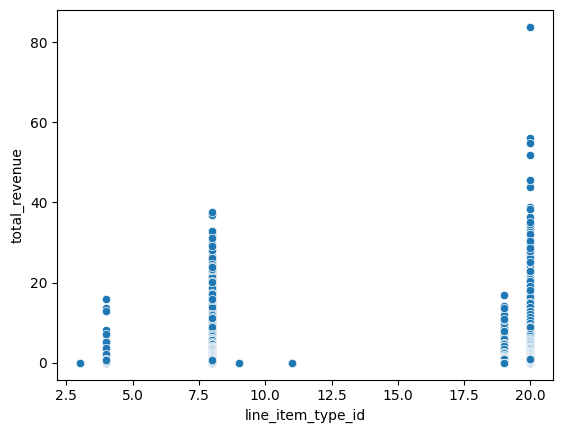

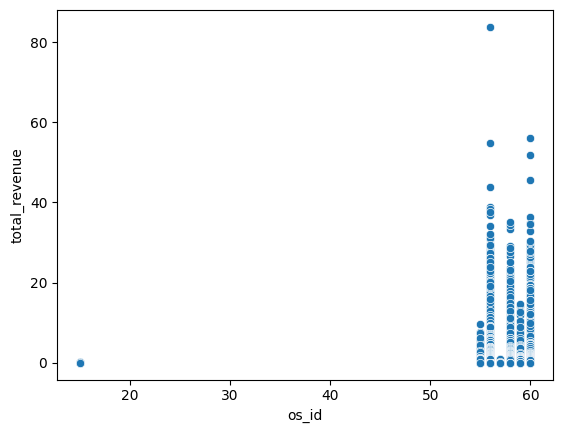

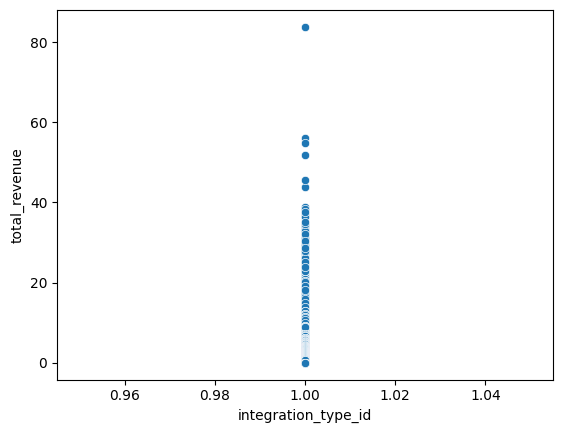

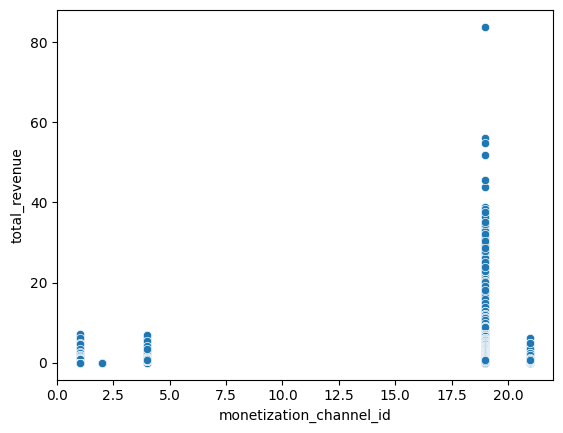

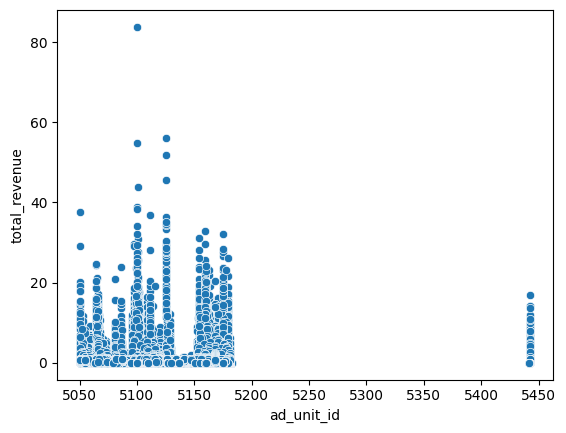

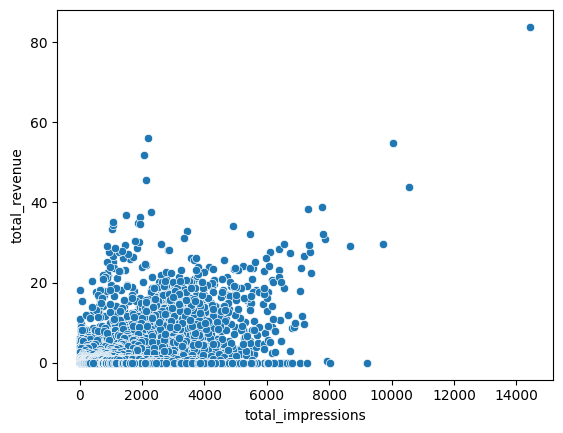

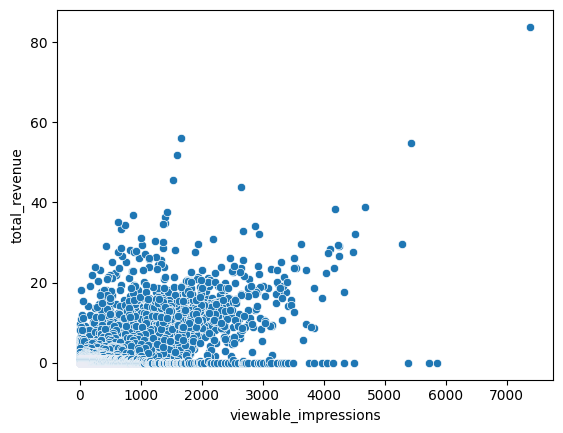

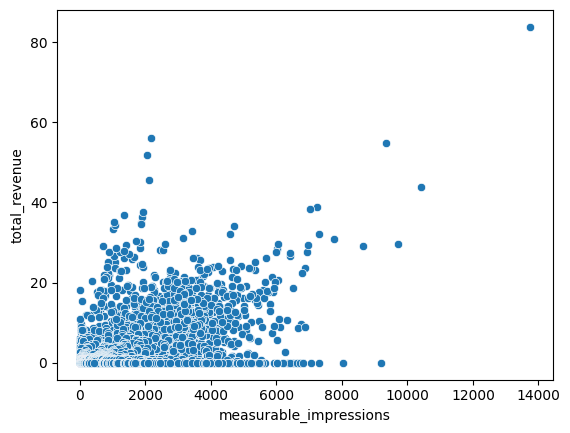

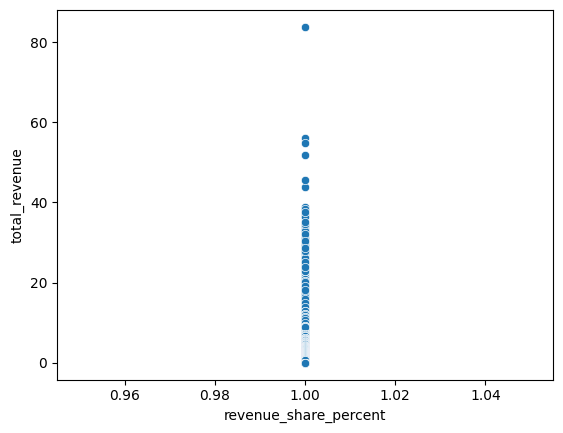

In [15]:
for i in num_col:
    if i!='total_revenue':
        sns.scatterplot(data=df,x=i,y='total_revenue')
        plt.show()

In [16]:
df.max()

date                       30-06-2024 00:00
site_id                                 351
ad_type_id                               17
geo_id                                  308
device_category_id                        5
advertiser_id                          2646
order_id                               3489
line_item_type_id                        20
os_id                                    60
integration_type_id                       1
monetization_channel_id                  21
ad_unit_id                             5443
total_impressions                     14452
total_revenue                        83.822
viewable_impressions                   7392
measurable_impressions                13756
revenue_share_percent                     1
dtype: object

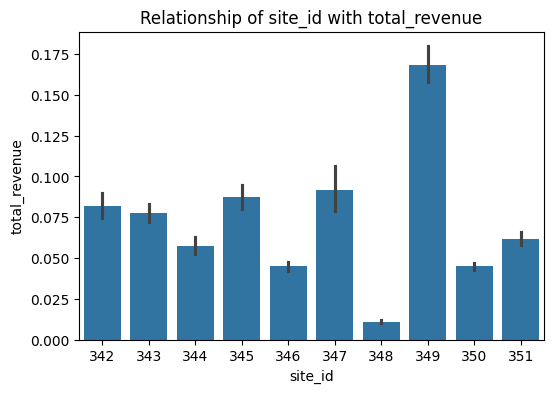

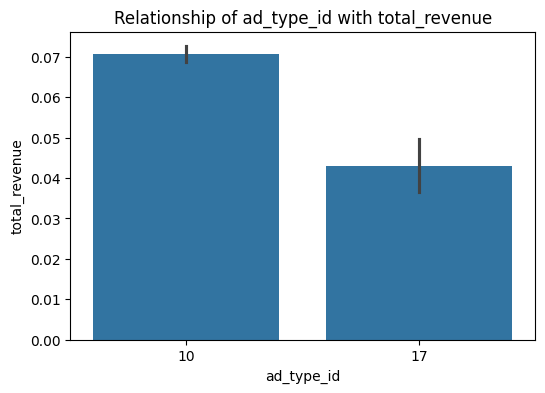

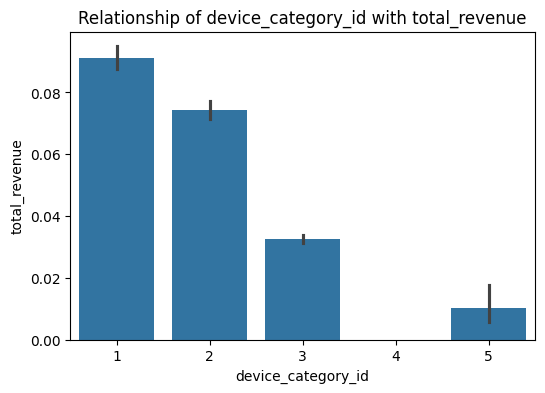

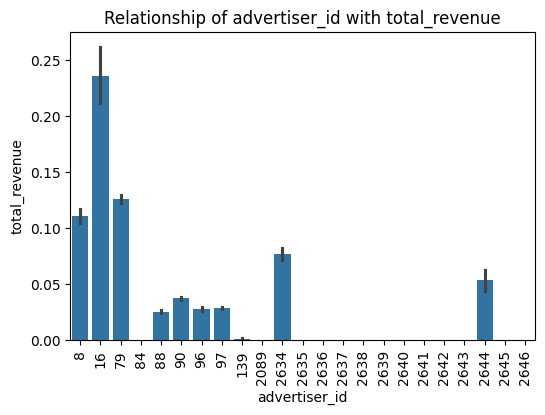

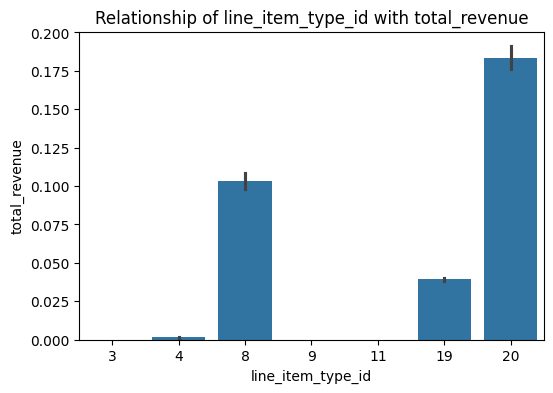

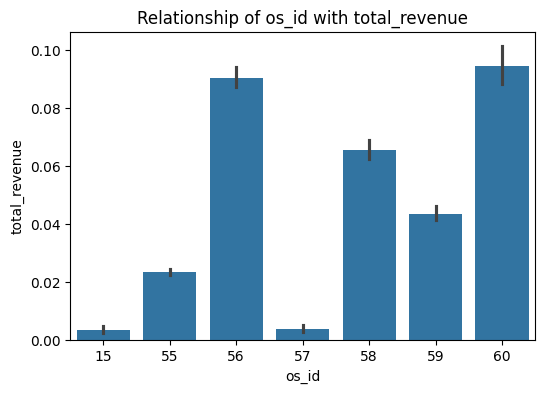

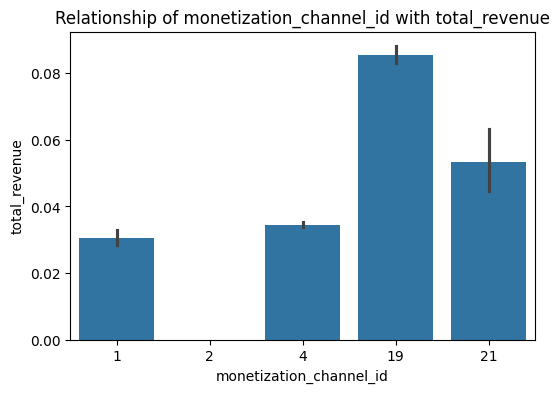

In [17]:
for col in (scat_col):
    title='Relationship of '+col+' with total_revenue'
    plt.figure(figsize=(6,4))
    sns.barplot(y=df['total_revenue'],x=df[col])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

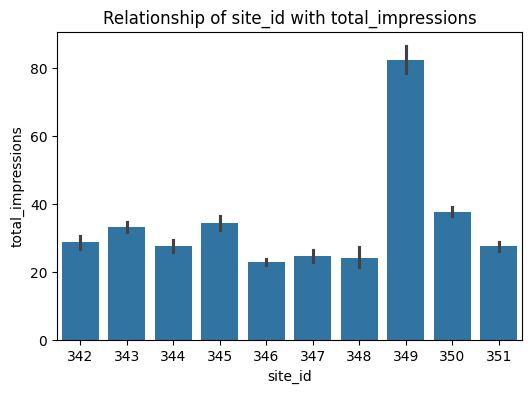

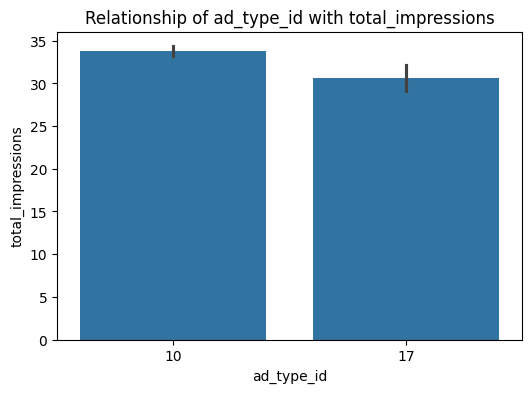

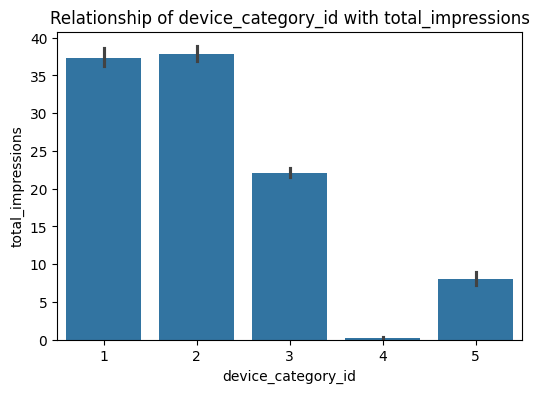

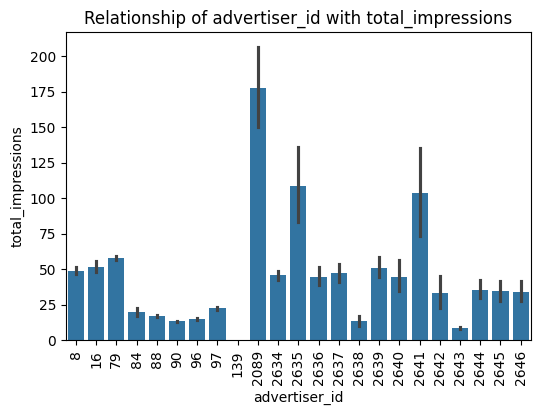

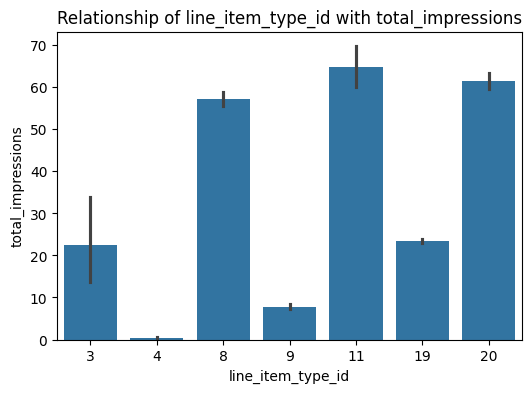

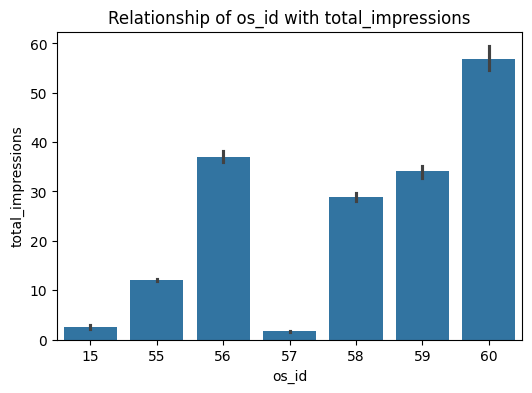

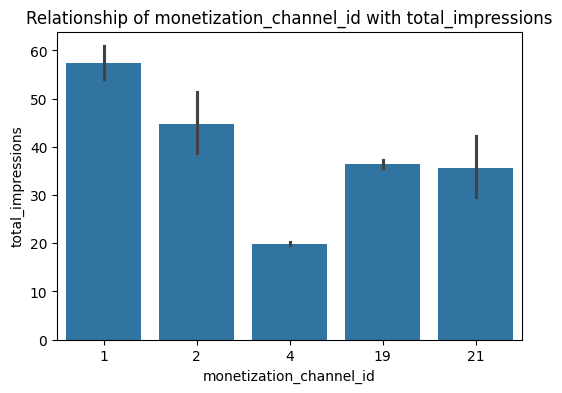

In [18]:
for col in (scat_col):
    title='Relationship of '+ col +' with total_impressions'
    plt.figure(figsize=(6,4))
    sns.barplot(y=df['total_impressions'],x=df[col],)
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

In [19]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

for i in cat_col:
    df[i]=df[i].astype('object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     567291 non-null  object 
 1   site_id                  567291 non-null  object 
 2   ad_type_id               567291 non-null  object 
 3   geo_id                   567291 non-null  object 
 4   device_category_id       567291 non-null  object 
 5   advertiser_id            567291 non-null  object 
 6   order_id                 567291 non-null  object 
 7   line_item_type_id        567291 non-null  object 
 8   os_id                    567291 non-null  object 
 9   integration_type_id      567291 non-null  int8   
 10  monetization_channel_id  567291 non-null  object 
 11  ad_unit_id               567291 non-null  int16  
 12  total_impressions        567291 non-null  int16  
 13  total_revenue            567291 non-null  float64
 14  view

In [21]:
df.drop(['ad_unit_id','revenue_share_percent','integration_type_id'],axis=1,inplace=True)
df.drop(['ad_type_id','site_id','advertiser_id'],axis=1,inplace=True)
df.drop(['date','geo_id','order_id'],axis=1,inplace=True)

In [22]:
df.select_dtypes(object)

,device_category_id,line_item_type_id,os_id,monetization_channel_id
0,2,19,58,4
1,2,19,60,4
2,2,19,58,4
3,3,20,59,19
4,3,20,59,19
...,...,...,...,...
567286,1,11,56,1
567287,1,11,56,1
567288,1,11,56,1
567289,2,11,60,1


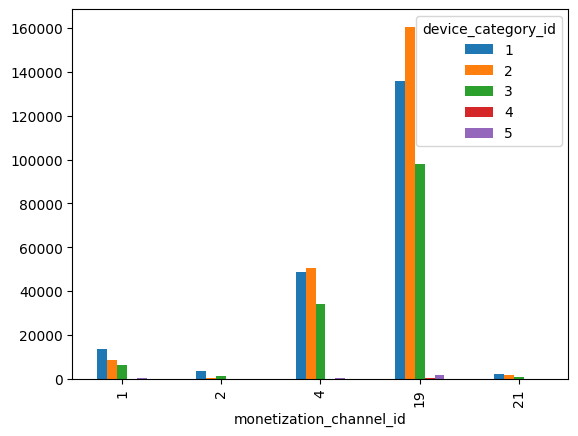

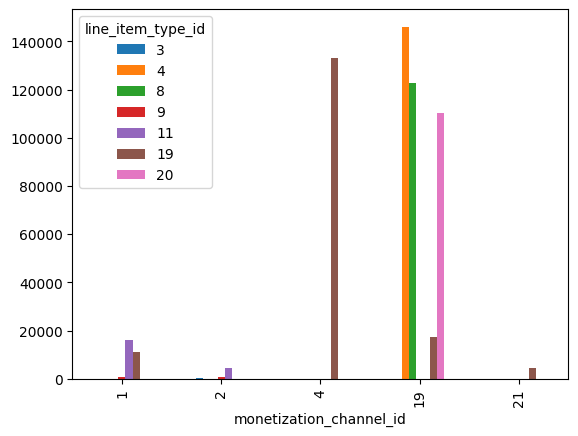

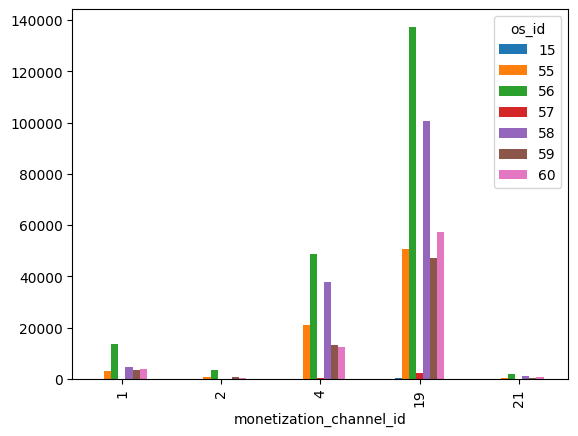

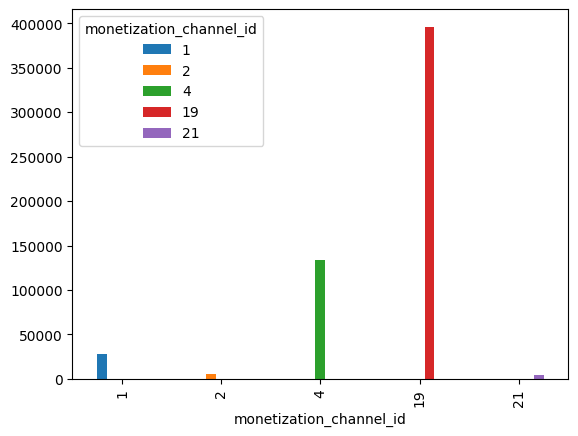

In [23]:
for i in df.select_dtypes(object).columns:
    pd.crosstab(df['monetization_channel_id'],df[i]).plot(kind='bar')
    plt.show()

# Predictive Modelling

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   device_category_id       567291 non-null  object 
 1   line_item_type_id        567291 non-null  object 
 2   os_id                    567291 non-null  object 
 3   monetization_channel_id  567291 non-null  object 
 4   total_impressions        567291 non-null  int16  
 5   total_revenue            567291 non-null  float64
 6   viewable_impressions     567291 non-null  int16  
 7   measurable_impressions   567291 non-null  int16  
dtypes: float64(1), int16(3), object(4)
memory usage: 24.9+ MB


In [25]:
Xd = df.drop('total_revenue',axis=1)
y = df['total_revenue']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xd,y,test_size=0.2,random_state=4)

In [27]:
pc_col=['total_impressions', 'viewable_impressions', 'measurable_impressions']

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=2))
        ]), pc_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['device_category_id', 'line_item_type_id', 'os_id',
       'monetization_channel_id'])
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [29]:
# pipeline.fit(X_train, y_train)

# y_pred_train = pipeline.predict(X_train)
# y_pred_test = pipeline.predict(X_test)

In [30]:
models = [
    {
        'name': 'ElasticNet',
        'regressor': [ElasticNet()],
        'regressor__alpha': [0.1, 1.0, 10.0, 100.0],
        'regressor__l1_ratio': [0.1, 0.5, 0.9]
    },

]

In [31]:


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Placeholder
])

best_estimators = []
for model_params in models:
    model_name = model_params.pop('name')  # Extract the model name
    grid_search = GridSearchCV(pipeline, model_params, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    best_estimators.append(best_estimator)
    print(f"Training completed for model {model_name}")
    
    # Save the best model
    joblib.dump(best_estimator, f'best_model_{model_name}.pkl')
    print(f"Best model {model_name} saved to best_model_{model_name}.pkl")

Training completed for model ElasticNet
Best model ElasticNet saved to best_model_ElasticNet.pkl


In [32]:
results = []
for estimator in best_estimators:
    y_pred = estimator.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'model': estimator.named_steps['regressor'].__class__.__name__,
        'best_params': estimator.named_steps['regressor'].get_params(),
        'mse': mse,
        'r2': r2
    })

results_df = pd.DataFrame(results)
results_df

,model,best_params,mse,r2
0,ElasticNet,"{'alpha': 0.1, 'copy_X': True, 'fit_intercept'...",0.247835,0.547455


In [ ]:
"{'FREQUENCY_EXCLUDING_NO_CAMPAIGN_AND_JULY22': {1255: 0.0, 1256: 0.8063977431392014}, 'Campaigns_Participation': {1255: -0.9027006598882314, 1256: 1.2289780068357847}, 'BOGO_OCT21': {1255: 0, 1256: 0}, 'BOGO_JUL21': {1255: 0, 1256: 1}, 'BOGO_APR21': {1255: 0, 1256: 0}, 'BOGO_APR22': {1255: 0, 1256: 0}, 'BOGO_OCT20': {1255: 0, 1256: 1}, 'REVENUE_EXCLUDING_NO_CAMPAIGN_AND_JULY22': {1255: 0.0, 1256: 0.0601113873101468}, 'BOGO_JAN21': {1255: 0, 1256: 1}, 'DISCOUNT_SALES': {1255: -0.926395712949521, 1256: -0.1189651307188687}, 'GROSS_SALES': {1255: -0.9893164236538848, 1256: 0.1514341294030138}, 'TOT_COST': {1255: -0.9690297722571054, 1256: 0.2908875327181201}, 'BOGO_JAN22': {1255: 0, 1256: 1}, 'CAMP_AND_NON_CAMP_PARTICIPATION': {1255: 0, 1256: 1}, 'Product_Affinity_4': {1255: 0.0, 1256: -0.0454079439991245}, 'FREQUENCY_NO_CAMPAIGN': {1255: -0.8362189306128238, 1256: 1.336105071681272}, 'DISC': {1255: -0.8143330006297512, 1256: -0.0819778110302264}, 'REVENUE_NO_CAMPAIGN': {1255: -0.9185275334967296, 1256: 0.0887071089884706}}"